In [1]:
#checking the ta-lib installation is correct

import talib
print("TA-Lib version:", talib.__version__)


TA-Lib version: 0.5.1


In [3]:
import sys
import os

# Add the 'scripts' folder to the system path
script_path = os.path.abspath('../scripts')  
sys.path.append(script_path)

# Importing the module
import finance_utils as fu

# Loading stock price data
file_path = 'C:\\Users\\HP\\OneDrive\\Desktop\\ai2\\kaim-week-01\\data\\META_historical_data.csv'
stock_data = fu.load_stock_data(file_path)

# Prepare the data
prepared_data = fu.prepare_stock_data(stock_data) 


# Display the first few rows of the processed data
print(prepared_data.head())


        Date       Open       High        Low      Close  Adj Close    Volume  \
0 2012-12-12  28.000000  28.139999  27.370001  27.580000  27.523441  46704200   
1 2012-12-13  27.590000  28.750000  27.430000  28.240000  28.182087  81051600   
2 2012-12-14  28.180000  28.330000  26.760000  26.809999  26.755020  91631600   
3 2012-12-17  26.770000  27.000000  26.320000  26.750000  26.695143  57742500   
4 2012-12-18  26.959999  27.910000  26.900000  27.709999  27.653173  60512900   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [7]:
# Import the module
import technical_analysis_indicator as ta

# Add a 20-day Simple Moving Average (SMA) to the prepared data
prepared_data = ta.add_sma(prepared_data, period=20)

# Add a 14-day Relative Strength Index (RSI) to the prepared data
prepared_data = ta.add_rsi(prepared_data, period=14)

# Add Bollinger Bands to the prepared data
prepared_data = ta.add_bollinger_bands(prepared_data, period=20)

# Add MACD to the prepared data
prepared_data = ta.add_macd(prepared_data)


# To handle NaN values
prepared_data = prepared_data.dropna()

# Display the first few rows
print(prepared_data.head(10))


          Date       Open       High        Low      Close  Adj Close  \
132 2013-06-24  23.950001  24.110001  23.379999  23.940001  23.890905   
133 2013-06-25  24.139999  24.430000  24.040001  24.250000  24.200270   
134 2013-06-26  24.510000  24.650000  23.990000  24.160000  24.110455   
135 2013-06-27  24.240000  24.840000  24.209999  24.660000  24.609428   
136 2013-06-28  24.680000  24.980000  24.420000  24.879999  24.828978   
137 2013-07-01  24.969999  25.059999  24.620001  24.809999  24.759121   
138 2013-07-02  24.700001  24.770000  24.299999  24.410000  24.359941   
139 2013-07-03  24.219999  24.709999  24.150000  24.520000  24.469717   
140 2013-07-05  24.650000  24.660000  24.200001  24.370001  24.320024   
141 2013-07-08  24.469999  25.040001  24.420000  24.709999  24.659327   

       Volume  Dividends  Stock Splits   SMA_20        RSI   BB_upper  \
132  40626000        0.0           0.0  23.8625  43.277880  24.795750   
133  24713200        0.0           0.0  23.8700  4

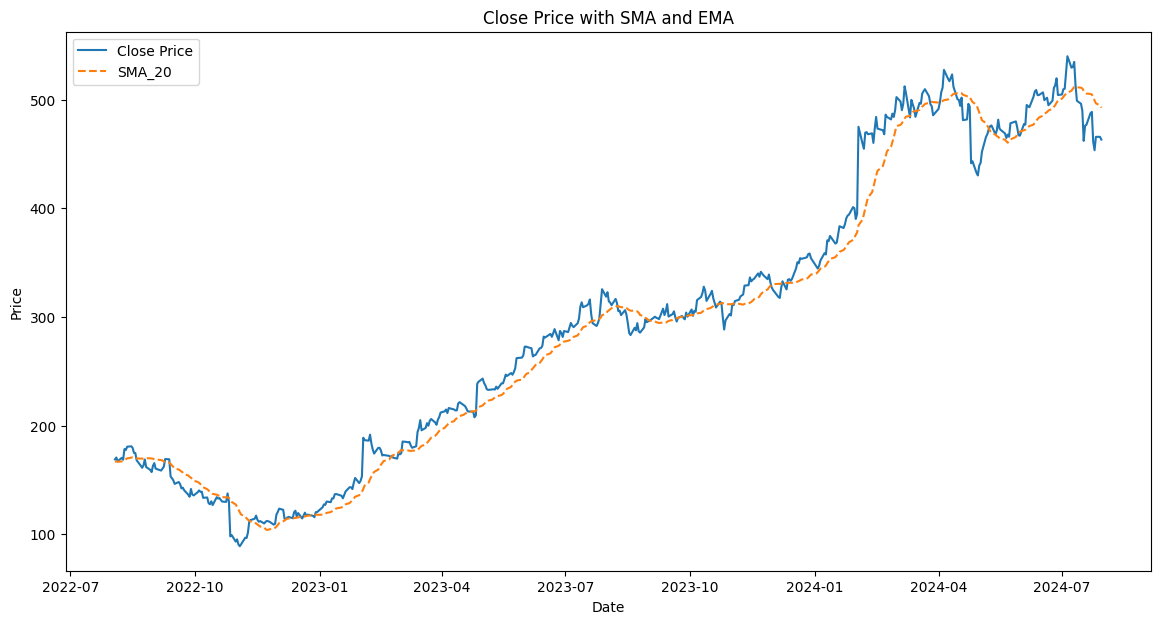

In [8]:
import visualization_utils as vu

# plot of the stock's close price with SMA and EMA with limited rows
vu.plot_close_with_moving_averages(prepared_data, num_rows=500)


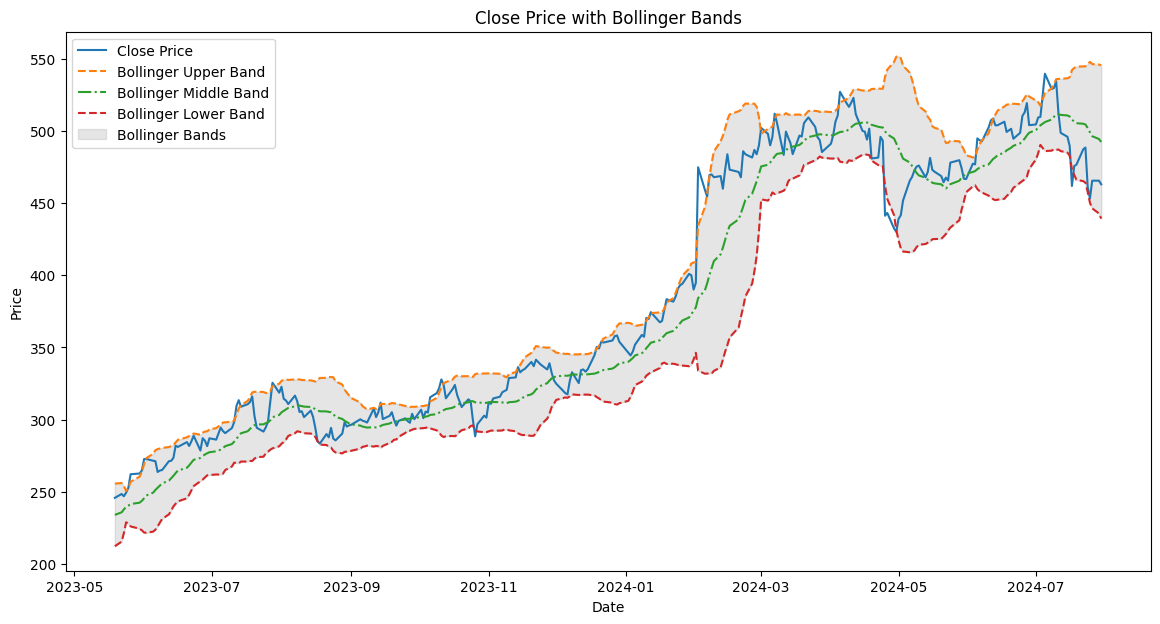

In [9]:
# plot of the stock's close price with Bollinger Bands with limited rows
vu.plot_bollinger_bands(prepared_data, num_rows=300)



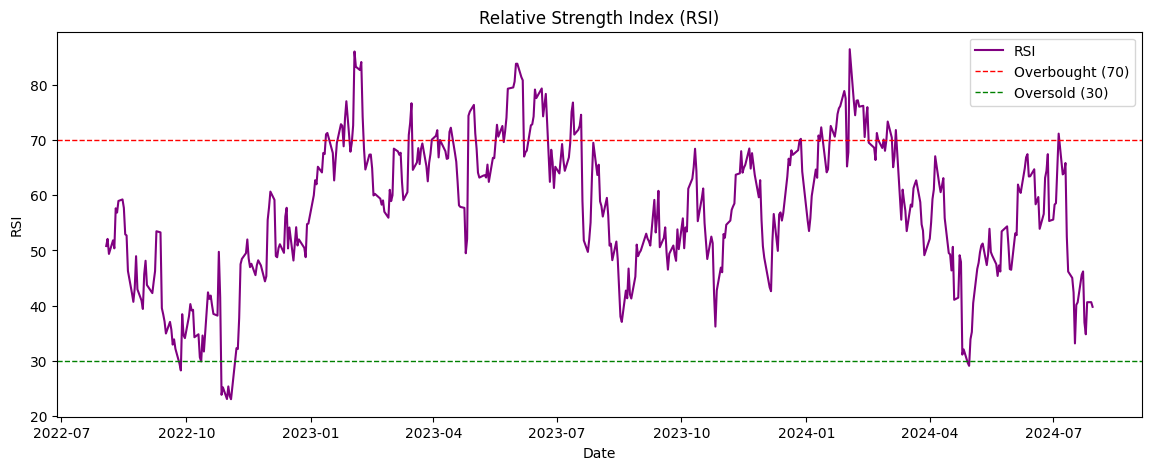

In [10]:
# plot of the RSI (Relative Strength Index) with limited rows
vu.plot_rsi(prepared_data, num_rows=500)

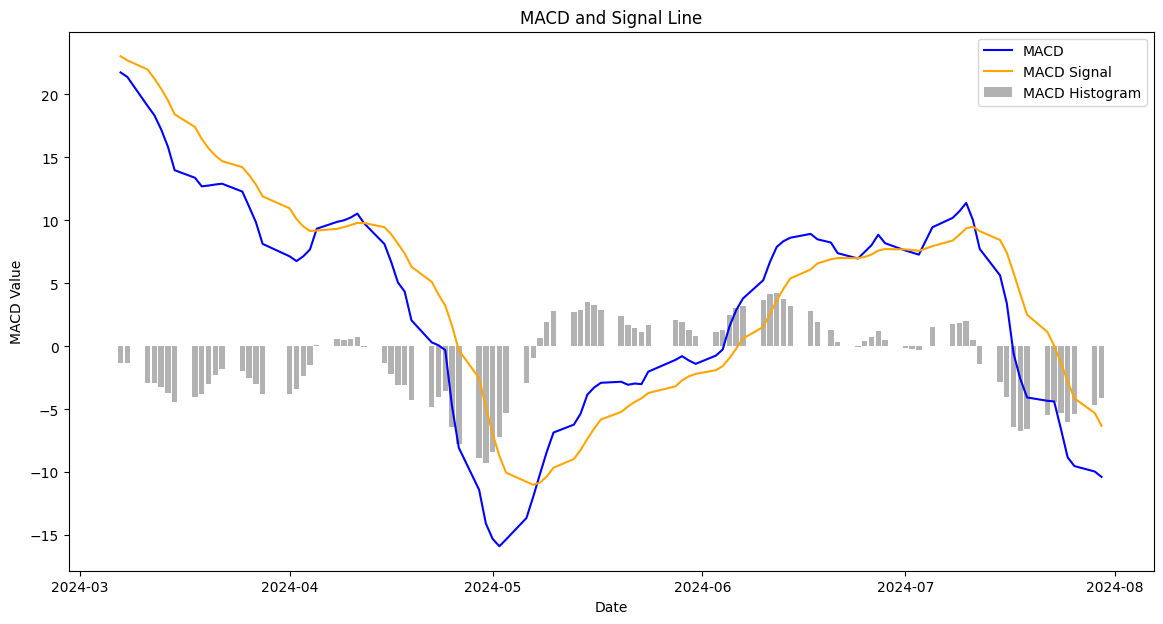

In [11]:
# plot the MACD (Moving Average Convergence Divergence) with limited rows
vu.plot_macd(prepared_data, num_rows=100)

C:\Users\HP\OneDrive\Desktop\ai2\kaim-week-01\scripts\visualization_utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_col] = pd.to_datetime(df[date_col])


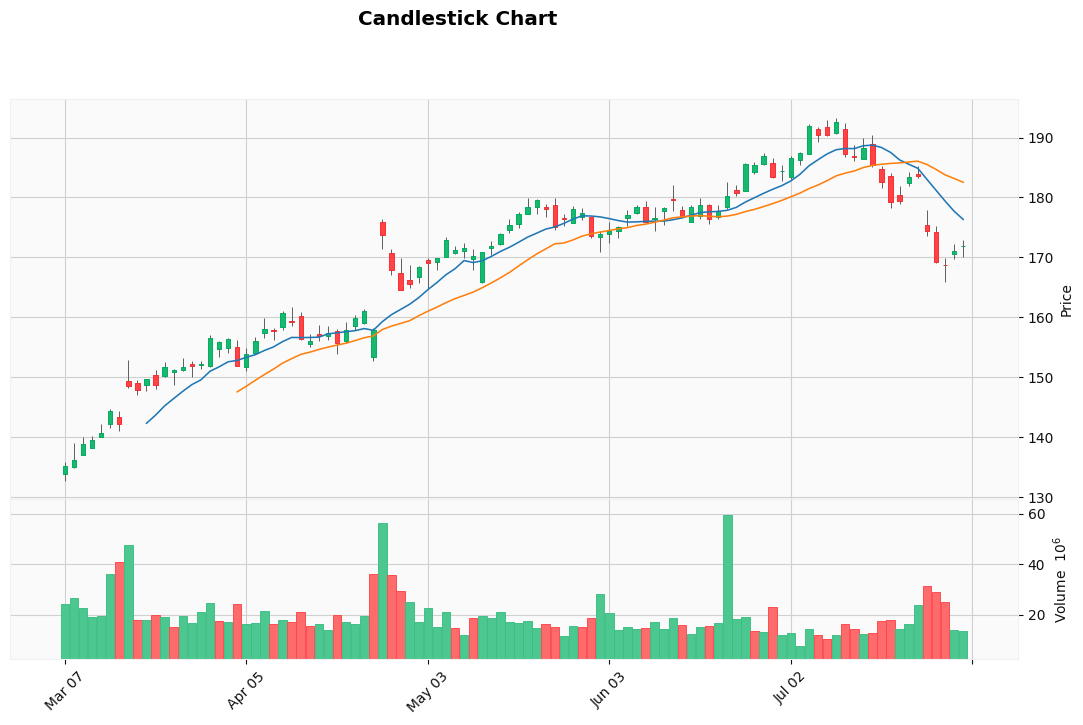

In [8]:
# plot of the candlestick chart with limited rows
vu.plot_candlestick_chart(prepared_data, num_rows=100)

In [12]:
# financial analysis using pynance 

# Add the 'scripts' folder to the system path
script_path = os.path.abspath('../scripts')  
sys.path.append(script_path)

import importlib
import pynance_analysis as pa
importlib.reload(pa)

# define stock symbol and data range
symbol = 'META'
start_date = '2023-01-01'
end_date = '2023-12-31'

# fetch data using fetch_data function
data = pa.fetch_data(symbol, start_date, end_date)

# check the fetched data
print(data.head())
print(data.columns)



        Date    Open      High     Low   Close    Volume
0 2023-12-29  358.99  360.0000  351.82  353.96  14987092
1 2023-12-28  359.70  361.9000  357.81  358.32  11798807
2 2023-12-27  356.07  359.0000  355.31  357.83  13207928
3 2023-12-26  354.99  356.9800  353.45  354.83   9898614
4 2023-12-22  355.58  357.1999  351.22  353.39  11772779
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [13]:
# function for calculating technical indicator
data = pa.calculate_indicators(data)
print(data.head())


         Date    Open     High       Low   Close    Volume    SMA_20  \
19 2023-12-01  325.48  326.860  320.7600  324.82  15276375  338.9465   
20 2023-11-30  331.89  333.500  322.4037  327.15  23146387  337.6060   
21 2023-11-29  339.69  339.900  330.7800  332.20  16024497  336.3000   
22 2023-11-28  333.40  339.375  333.4000  338.99  12637245  335.3580   
23 2023-11-27  336.18  339.900  334.2000  334.70  15684454  334.3515   

        EMA_20        RSI  BB_middle    BB_upper    BB_lower      MACD  \
19  334.831567  27.221790   338.9465  367.345228  310.547772 -8.516728   
20  334.099989  32.086774   337.6060  365.548159  309.663841 -8.052381   
21  333.919038  36.188013   336.3000  362.556518  310.043482 -7.193963   
22  334.401987  45.785297   335.3580  359.639769  311.076231 -5.897778   
23  334.430369  49.820789   334.3515  356.837209  311.865791 -5.157259   

    MACD_signal  MACD_hist  
19    -6.722258  -1.794470  
20    -6.988283  -1.064099  
21    -7.029419  -0.164544  
22    

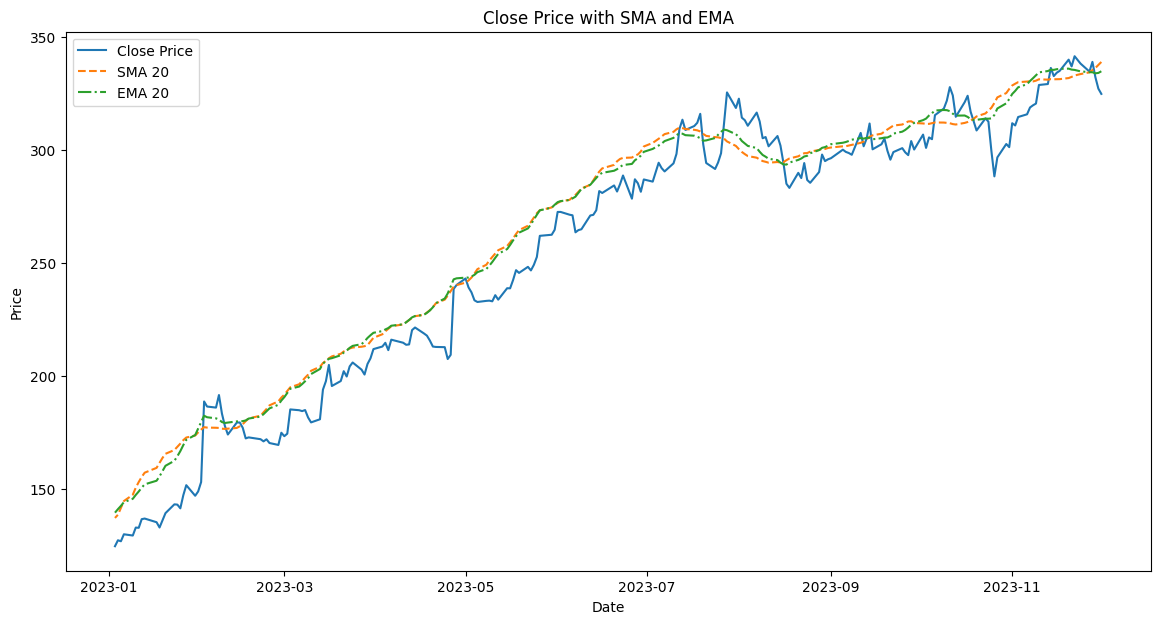

In [14]:
# visulazation of close price with sma amd ema 
pa.plot_close_with_indicators(data)

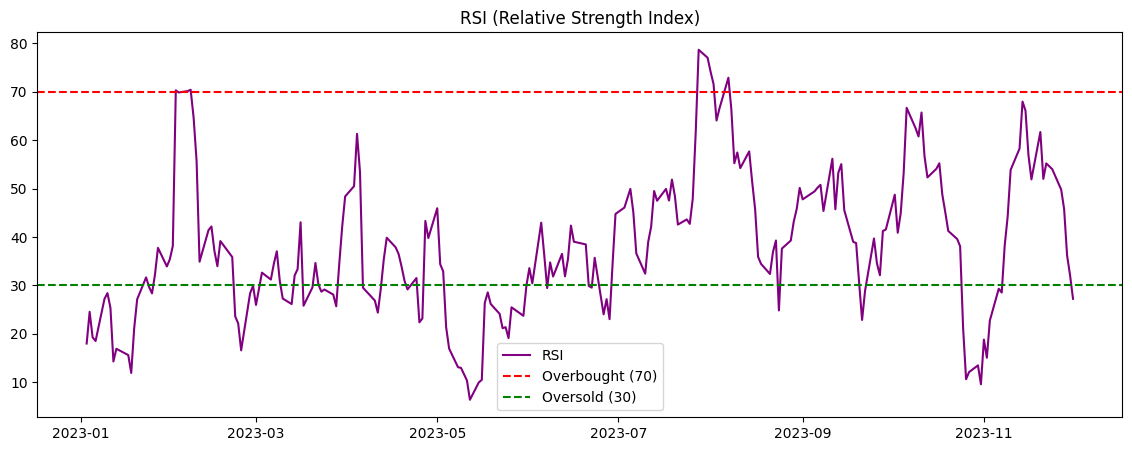

In [15]:

pa.plot_rsi(data)

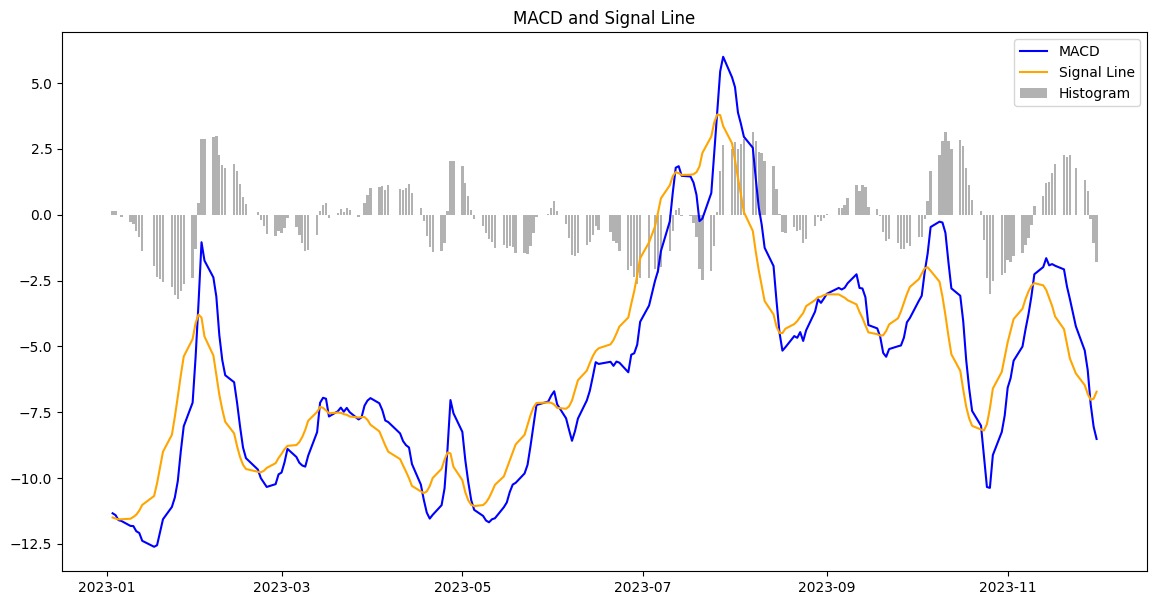

In [17]:
pa.plot_macd(data)

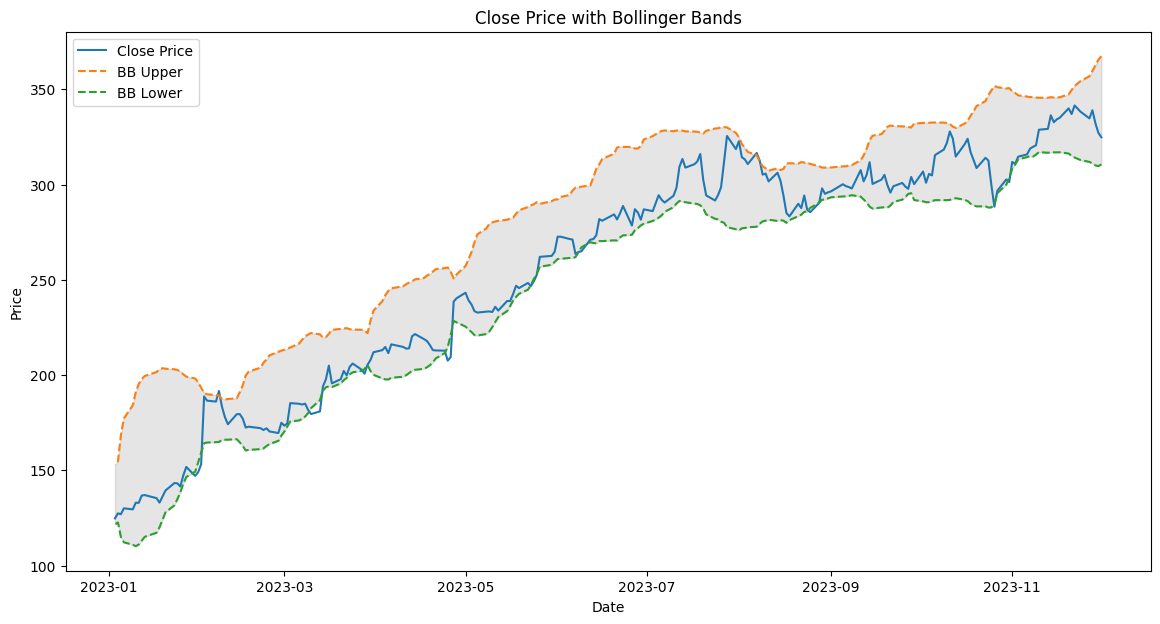

In [18]:
pa.plot_bollinger_bands(data)

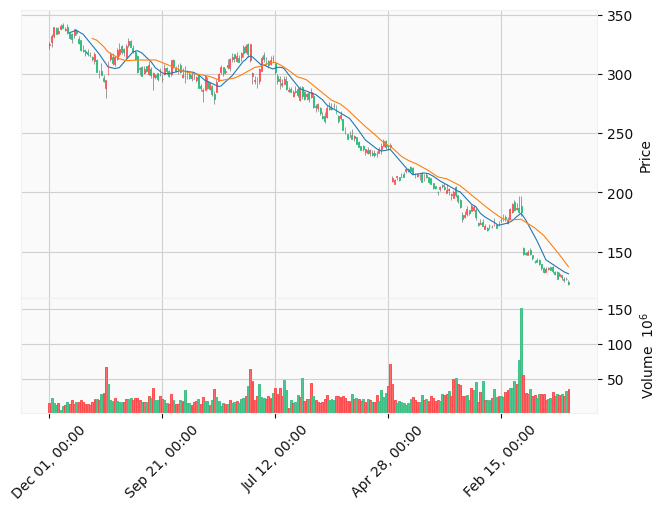

In [19]:
pa.plot_candlestick_chart(data)